In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm

In [7]:
data = {
    "EURUSD": "./data/EURUSD_D1.csv",
    "USDJPY": "./data/USDJPY_D1.csv",
    "GBPUSD": "./data/GBPUSD_D1.csv",
    "USDCAD": "./data/USDCAD_D1.csv",
    "USDCHF": "./data/USDCHF_D1.csv",
}

In [8]:
data = {k: pd.read_table(v, names=["datetime", "open", "high", "low", "close", "volume"]) for k, v in data.items()}
for k, v in data.items():
    v["datetime"] = pd.to_datetime(v["datetime"])

In [10]:
data["USDJPY"].head()

,datetime,open,high,low,close,volume
0,2007-11-02,114.710,115.42,114.475,114.815,1286662
1,2007-11-04,114.760,114.77,114.485,114.560,224246
2,2007-11-05,114.560,114.81,114.020,114.330,3434766
3,2007-11-06,114.330,114.78,114.260,114.715,1833988
4,2007-11-07,114.715,114.78,112.045,112.620,1683334


In [11]:
close_prices = pd.DataFrame({k: v["close"] for k,v in data.items()})

In [12]:
close_prices.head()

,EURUSD,USDJPY,GBPUSD,USDCAD,USDCHF
0,1.48502,114.815,2.06155,0.98480,1.10090
1,1.48358,114.560,2.06228,0.98765,1.10183
2,1.48322,114.330,2.06355,0.98555,1.10345
3,1.48710,114.715,2.06880,0.98870,1.09690
4,1.48332,112.620,2.06705,0.99575,1.10520


In [13]:
delta_close_prices = (close_prices.shift(-1) - close_prices).fillna(0)

In [14]:
delta_close_prices.describe()

,EURUSD,USDJPY,GBPUSD,USDCAD,USDCHF
count,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000
mean,-0.000077,0.006410,-0.000158,0.000074,-0.000046
std,0.006780,0.613323,0.008179,0.006055,0.005955
min,-0.038200,-5.084000,-0.089940,-0.046200,-0.165100
25%,-0.003250,-0.266750,-0.003928,-0.002800,-0.002600
50%,0.000010,0.022000,0.000030,0.000150,0.000220
75%,0.003100,0.285000,0.003835,0.002840,0.002460
max,0.045500,4.995000,0.055500,0.043050,0.076000


<Axes: ylabel='Frequency'>

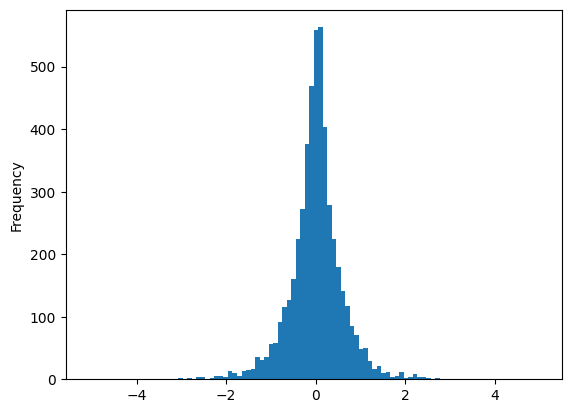

In [17]:
delta_close_prices["USDJPY"].plot(kind="hist", bins=100)

array([[<Axes: xlabel='EURUSD', ylabel='EURUSD'>,
        <Axes: xlabel='USDJPY', ylabel='EURUSD'>,
        <Axes: xlabel='GBPUSD', ylabel='EURUSD'>,
        <Axes: xlabel='USDCAD', ylabel='EURUSD'>,
        <Axes: xlabel='USDCHF', ylabel='EURUSD'>],
       [<Axes: xlabel='EURUSD', ylabel='USDJPY'>,
        <Axes: xlabel='USDJPY', ylabel='USDJPY'>,
        <Axes: xlabel='GBPUSD', ylabel='USDJPY'>,
        <Axes: xlabel='USDCAD', ylabel='USDJPY'>,
        <Axes: xlabel='USDCHF', ylabel='USDJPY'>],
       [<Axes: xlabel='EURUSD', ylabel='GBPUSD'>,
        <Axes: xlabel='USDJPY', ylabel='GBPUSD'>,
        <Axes: xlabel='GBPUSD', ylabel='GBPUSD'>,
        <Axes: xlabel='USDCAD', ylabel='GBPUSD'>,
        <Axes: xlabel='USDCHF', ylabel='GBPUSD'>],
       [<Axes: xlabel='EURUSD', ylabel='USDCAD'>,
        <Axes: xlabel='USDJPY', ylabel='USDCAD'>,
        <Axes: xlabel='GBPUSD', ylabel='USDCAD'>,
        <Axes: xlabel='USDCAD', ylabel='USDCAD'>,
        <Axes: xlabel='USDCHF', ylabel='USDCAD'

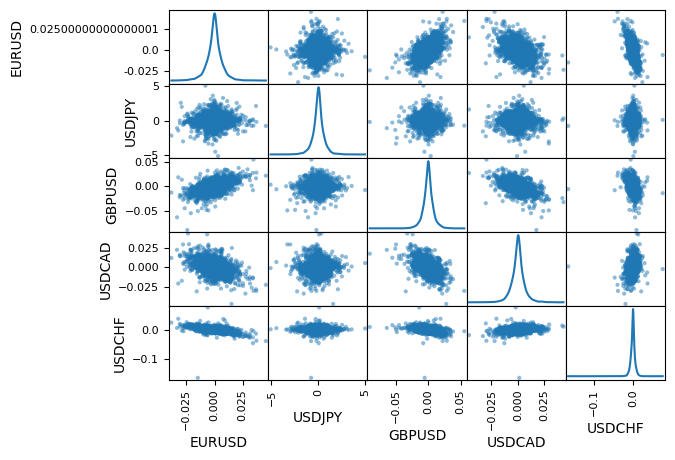

In [19]:
pd.plotting.scatter_matrix(delta_close_prices, diagonal="kde", grid=True)

In [20]:
delta_close_prices.corr()

,EURUSD,USDJPY,GBPUSD,USDCAD,USDCHF
EURUSD,1.000000,0.037888,0.504919,-0.395705,-0.585568
USDJPY,0.037888,1.000000,0.015394,-0.008906,-0.013583
GBPUSD,0.504919,0.015394,1.000000,-0.499355,-0.419530
USDCAD,-0.395705,-0.008906,-0.499355,1.000000,0.315212
USDCHF,-0.585568,-0.013583,-0.419530,0.315212,1.000000


<Axes: >

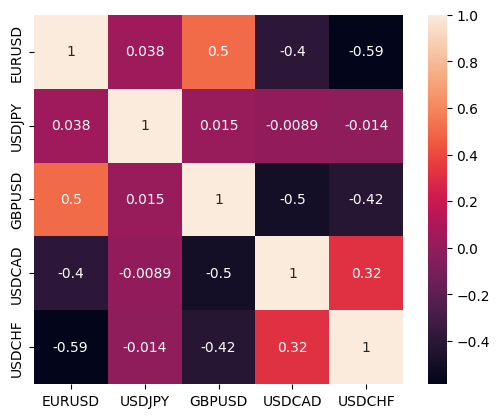

In [22]:
sns.heatmap(delta_close_prices.corr(), annot=True, square=True)

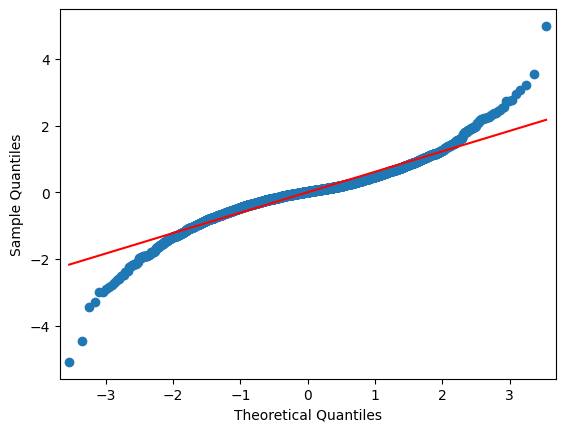

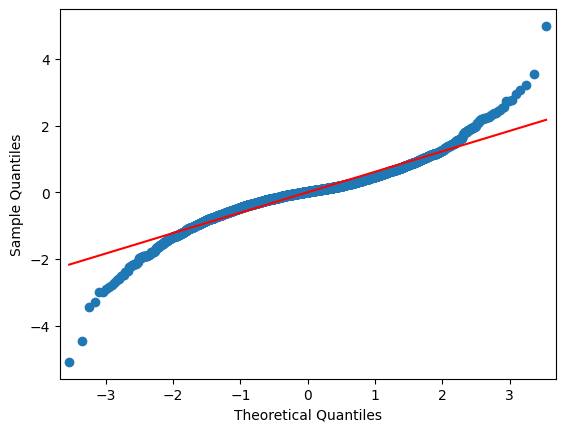

In [24]:
qqplot(delta_close_prices["USDJPY"], line="s")

<Axes: >

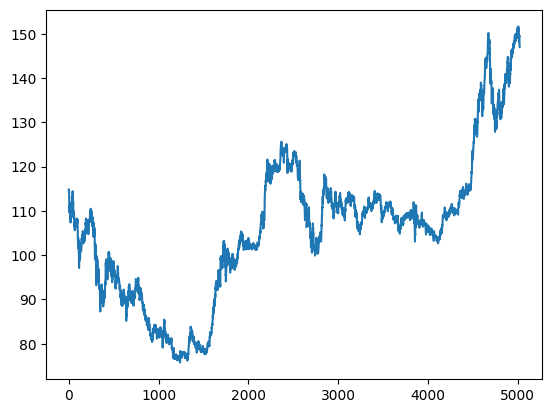

In [26]:
close_prices["USDJPY"].plot()

In [30]:
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(close_prices["USDJPY"])

<Axes: >

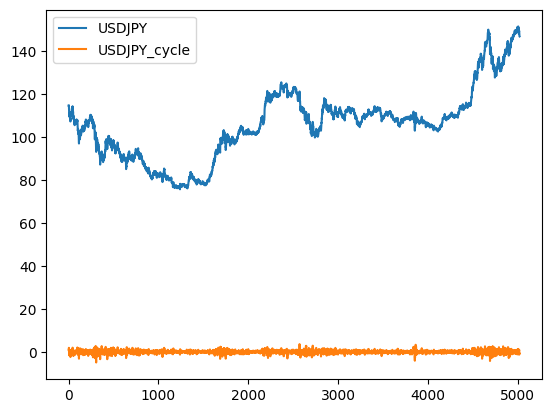

In [38]:
pd.concat([close_prices["USDJPY"], hp_cycle], axis=1).plot()

In [41]:
uc = sm.tsa.UnobservedComponents(close_prices["USDJPY"], level="lltrend", cycle=True, stochastic_cycle=True)
res_uc = uc.fit(method="powell", disp=True)


Optimization terminated successfully.
         Current function value: 0.930053
         Iterations: 5
         Function evaluations: 357


In [42]:
res_uc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:                 USDJPY   No. Observations:                 5022
Model:             local linear trend   Log Likelihood               -4670.728
                   + stochastic cycle   AIC                           9351.455
Date:                Tue, 05 Dec 2023   BIC                           9384.059
Time:                        09:28:16   HQIC                          9362.880
Sample:                             0                                         
                               - 5022                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0087      0.004      2.219      0.027       0.001       0.016
sigma2.level         0.1418      0.004     33.109      0.000       0.133       0.150
sigma2.trend      5.254e-07   7.51e-07      0.699      0.484   -9.47e-07       2e-06
sigma2.cycle         0.2195      0.004     51.272      0.000       0.211       0.228
frequency.cycle   1.178e-08     13.153   8.96e-10      1.000     -25.780      25.780
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              6714.09
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.17
Prob(H) (two-sided):                  0.03   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.99e+19. Standard errors may be unstable.
"""

In [49]:
decomp = pd.DataFrame({
    "price": close_prices["USDJPY"],
    "UC_Cycle": res_uc.cycle.smoothed,
    "UC_Trend": res_uc.level.smoothed,
    "UC_Error": res_uc.resid
})

In [50]:
decomp

,price,UC_Cycle,UC_Trend,UC_Error
0,114.815,57.404764,57.404777,114.815000
1,114.560,57.266839,57.293904,-0.255000
2,114.330,57.147694,57.195159,0.024999
3,114.715,57.353346,57.306152,0.627780
4,112.620,56.156511,56.511487,-2.050677
...,...,...,...,...
5017,149.580,59.016794,90.532122,0.156017
5018,148.414,58.307334,90.102458,-1.194129
5019,147.065,57.491526,89.604117,-1.406678
5020,147.056,57.450048,89.605802,-0.069894


<Axes: >

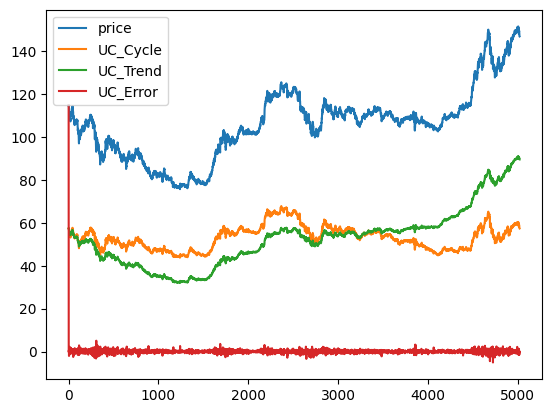

In [51]:
decomp.plot()